In [1]:
# Using Keras to create a 10 neurons and single layer NN
# Against the MNIST databesa

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
nb_classes = 10

np.random.seed(42)
%matplotlib notebook

Using TensorFlow backend.


In [19]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

# Show some images
def show(X_train, y_train):
	for i in range(9):
	    plt.subplot(3,3,i+1)
	    plt.imshow(X_train[i], cmap='gray', interpolation='none')
	    plt.title("Class {}".format(y_train[i]))
	plt.show()

# Swish activation function
# x*sigmoid(x)
def swish(x):
    return x*K.sigmoid(x)

# Custom activation function 1
# mix between relu and positive part of swish mirrored across x=1
def e_swish_1(x):
    return K.maximum(0.0, x*(2-K.sigmoid(x)))

# Custom activation function 2
# positive part of swish mirrored across x=1
def e_swish(x):
    return K.maximum(x*K.sigmoid(x), x*(2-K.sigmoid(x)))

# Leaky ReLU
def leaky(x, alpha=0.3):
    return K.maximum(x*alpha, x)

show(X_train, y_train)

# Reshape arrays
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [20]:
activations = [e_swish, swish, "relu", "elu", leaky] # e_swish_1, 
names = activations[:]
for i,a in enumerate(names):
    if not isinstance(a, str):
        names[i] = a.__name__
print(names)

['e_swish', 'swish', 'relu', 'elu', 'leaky']


In [6]:
def create_models():
    models = []

    sgd = SGD(lr=0.1)
    # create models - ALCAIDES, SWISH, RELU, DIGMOID, TANH
    for act in activations:
        model1 = Sequential()
        model1.add(Dense(200, input_dim=784, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(100, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(60, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(30, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(10, activation='softmax'))
        models.append(model1)

    # Compile models
    for model in models:
        with tf.device('/cpu:0'):
            model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Create Accuracy history
    acc = []
    for model in models: acc.append([0])
        
    return models, acc

In [24]:
def test_against(models, epochs, acc):
   
        
    for j in range(epochs):
        for i,model in enumerate(models):
            print("Training model {0}".format(i))
            with tf.device('/cpu:0'):
                model.fit(X_train, Y_train, epochs=1, batch_size=64,  verbose=1, validation_data=(X_test, Y_test))
                scores = model.evaluate(X_test, Y_test)
            acc[i].append(scores[1]*100)
        print("///////////////////////////////////////////////")
        print("/////////////////////{0}//////////////////////////".format(j))
        print("///////////////////////////////////////////////")

    return models, acc

# Plot the evolution of the accuracies
def plot_results(accs):
    plt.figure()
    plt.title("Test error for different activation functions on MNIST")
    plt.xlabel("Number of epochs")
    plt.ylabel("Test error (%)")
    plt.xticks(range(21))
    for i,acc in enumerate(accs):
        if i>0:plt.plot(100-np.array(acc))
    plt.grid()
    plt.legend(names[0:], loc='upper right')
    plt.show()

In [8]:
kernels, acc = create_models()

In [9]:

kernels, acc = test_against(kernels, 20, acc)
# kernels_, acc = test_against(kernels_, 20, acc)

Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Training model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 40us/step
Training model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 39us/step
Training model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 36us/step
Training model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 36us/step
Training model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
///////////////////////////////////////////////
/////////////////////0//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 s

10000/10000 [==============================] - 0s 36us/step
Training model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
///////////////////////////////////////////////
/////////////////////4//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Training model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 40us/step
Training model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Training model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 35us/step
Training model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [====================

10000/10000 [==============================] - 0s 35us/step
Training model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 36us/step
Training model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
///////////////////////////////////////////////
/////////////////////9//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Training model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 40us/step
Training model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Training model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [====================

10000/10000 [==============================] - 0s 39us/step
Training model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
Training model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 36us/step
Training model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
Training model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 38us/step
///////////////////////////////////////////////
/////////////////////14//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 39us/step
Training model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [===================

10000/10000 [==============================] - 0s 38us/step
Training model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 40us/step
Training model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 37us/step
Training model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 36us/step
Training model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 36us/step
Training model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 39us/step
///////////////////////////////////////////////
/////////////////////19//////////////////////////
///////////////////////////////////////////////


<IPython.core.display.Javascript object>


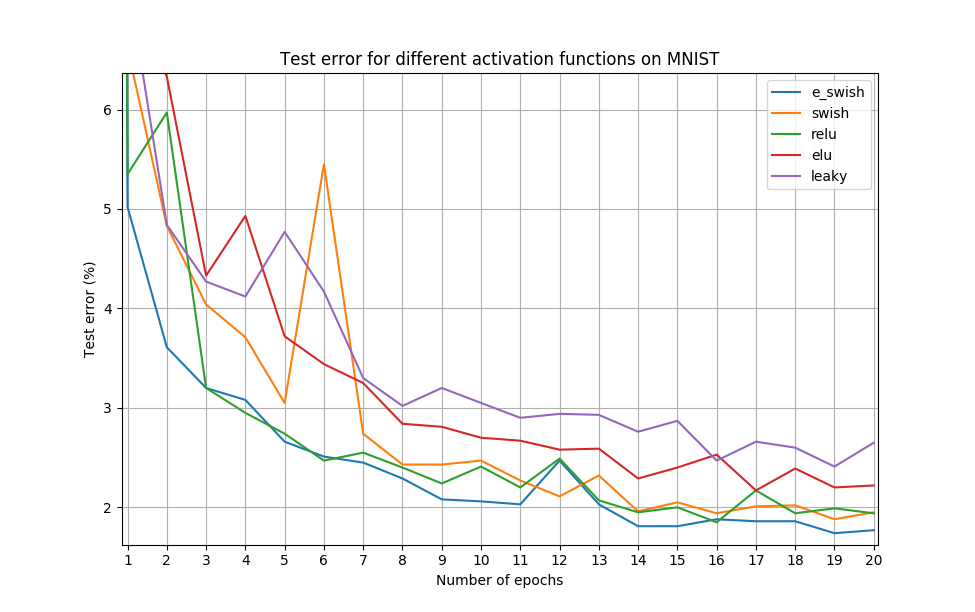

[[0, 94.340000000000003, 95.63000000000001, 96.569999999999993, 97.11999999999999, 97.109999999999999, 97.040000000000006, 97.469999999999999, 97.200000000000003, 97.5, 97.689999999999998, 97.590000000000003, 97.409999999999997, 97.709999999999994, 97.72999999999999, 98.099999999999994, 97.890000000000001, 97.969999999999999, 97.989999999999995, 98.219999999999999, 97.960000000000008], [0, 94.980000000000004, 96.390000000000001, 96.799999999999997, 96.920000000000002, 97.340000000000003, 97.489999999999995, 97.549999999999997, 97.709999999999994, 97.920000000000002, 97.939999999999998, 97.969999999999999, 97.530000000000001, 97.969999999999999, 98.189999999999998, 98.189999999999998, 98.11999999999999, 98.140000000000001, 98.140000000000001, 98.260000000000005, 98.22999999999999], [0, 93.379999999999995, 95.170000000000002, 95.960000000000008, 96.289999999999992, 96.950000000000003, 94.549999999999997, 97.260000000000005, 97.570000000000007, 97.570000000000007, 97.530000000000001, 97.7

In [25]:
plot_results(acc)
print(acc)